In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import math

# Code

In [2]:
def predicted_means(mu, sigma, n):
    sample_size, estimated_mean, error = [*range(1, n+1)], [], []
    first_10_small_errors, count10, error10 = False, 0, 0.01*mean

    np.random.seed(938491)
    for i in range(1, max_sample_size + 1):
        sample = np.random.normal(loc=mean, scale=standard_dev, size=i)
        mean_sample = sum(sample) / i
        estimated_mean.append(mean_sample)
        abs_error = abs(mean_sample - mean)
        error.append(abs_error)
        
        # see where first 10 consecutive small errors occur
        if not first_10_small_errors and abs_error < error10:
            count10 += 1
            if count10 == 10:
                first_10_small_errors = i - 10
    
    return (sample_size, estimated_mean, error, first_10_small_errors)

In [3]:
def plot_LLN(mean, standard_dev, max_sample_size):   
    sample_size, estimated_mean, error, good_sample_size = predicted_means(mean, standard_dev, max_sample_size)
    
    # plot sample means for different sample sizes
    plt.subplot(2, 1, 1)
    plt.title(f'LLN: sample from N(\u03BC={mean}, \u03C3^2={standard_dev**2})')
    plt.ylabel('Sample Means')
    plt.plot(sample_size, estimated_mean)
    plt.axvline(x=good_sample_size, linewidth=1, color="red", label="10 consecutive errors < 1% of the mean")
    plt.legend()
    
    # plot absolute difference between true and sample mean
    plt.subplot(2, 1, 2)
    plt.ylabel('Absolute errors')
    plt.xlabel('Sample Sizes')
    plt.plot(sample_size, error)
    plt.axvline(x=good_sample_size, linewidth=1, color="red", label="10 consecutive errors < 1% of the mean")
    plt.legend(loc="best")
    
    plt.show()

In [4]:
def plot_CLT(number_of_samples, sample_size, kappa, theta, number_of_bins):
    means_small_sample, means_large_sample = [], []
    
    np.random.seed(19382038)
    for _ in range(number_of_samples):
        sample_small = np.random.gamma(shape=kappa, scale=theta, size=sample_size)
        mean_small_sample = sum(sample_small) / sample_size
        means_small_sample.append(mean_small_sample)
        sample_large = np.random.gamma(shape=kappa, scale=theta, size=sample_size*10)
        mean_large_sample = sum(sample_large) / (10*sample_size)
        means_large_sample.append(mean_large_sample)
        
    plt.subplot(1,2,1)
    
    # plot a histogram of sample means obtained in the different random samples
    plt.hist(means_small_sample, bins=number_of_bins, density=True)
    plt.title(f'{number_of_samples} samples (n={sample_size})')
    plt.xlabel('Sample Means')
    
    # plot the normal distribution to which the distribution of the sample mean should converge to in distribution
    mu = kappa * theta
    sigma = math.sqrt(kappa * (theta**2))/ math.sqrt(sample_size)
    x = np.linspace(mu-3*sigma, mu+3*sigma, 10000)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label="\u03C6(\u03BA\u03B8, \u03BA\u03B8^2/n)")
    plt.legend()
    
    plt.subplot(1,2,2)
    
    # repeat for 10 times larger sample size
    plt.hist(means_large_sample, bins=number_of_bins, density=True)
    plt.title(f'(n={10*sample_size}) from gamma(\u03BA={kappa}, \u03B8={theta})')
    plt.xlabel('Sample Means')
    
    sigma = math.sqrt(kappa * (theta**2))/ math.sqrt(sample_size*10)
    x = np.linspace(mu-3*sigma, mu+3*sigma, 10000)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label="\u03C6(\u03BA\u03B8, \u03BA\u03B8^2/n)")
    plt.legend()
    
    plt.show()

# (Weak) Law of Large Numbers

$\lim_{n\to\infty}\Pr\!\left(\,|\overline{X}_n-\mu| < \varepsilon\,\right) = 1, \forall \varepsilon > 0$.

The sample average converges in probability to the expected value.

The law applies if the random variables are idependent and identically distributed.

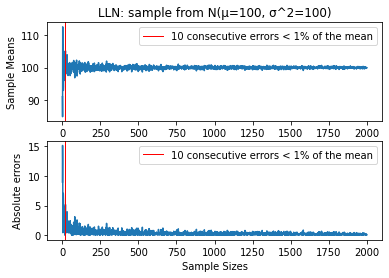

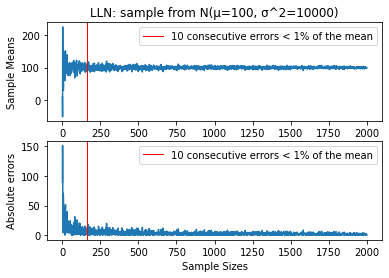

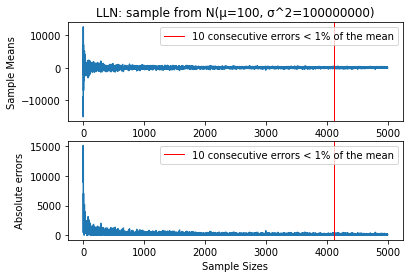

In [5]:
mean, standard_dev, max_sample_size = 100, 10, 2000
plot_LLN(mean, standard_dev, max_sample_size)

standard_dev *= 10
plot_LLN(mean, standard_dev, max_sample_size)

standard_dev *= 100
max_sample_size = int(2.5 * max_sample_size)
plot_LLN(mean, standard_dev, max_sample_size)

# (Lindeberg–Lévy) CLT

$\{X_1, \ldots, X_n\}$ is a sequence of independent and identically distributed random variables with $\mathbb{E}[X_i] = \mu$ and finite $\operatorname{Var}[X_i] = \sigma^2$ then:

$\sqrt{n}(\bar{X}_n - \mu) \xrightarrow{d} \mathcal{N}(0, \sigma^2)$ or rewritten: $\bar{X}_n \xrightarrow{d} \mathcal{N}(\mu, \frac{\sigma^2}{n})$ as n $\xrightarrow{} \infty$, the latter is shown below for samples from the gamma distribution.

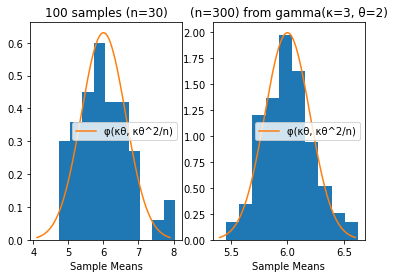

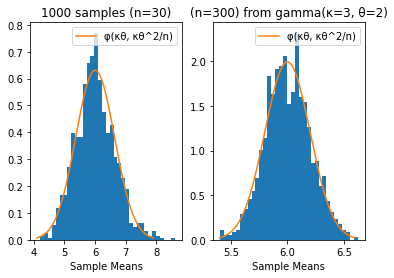

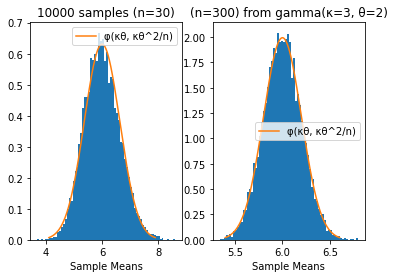

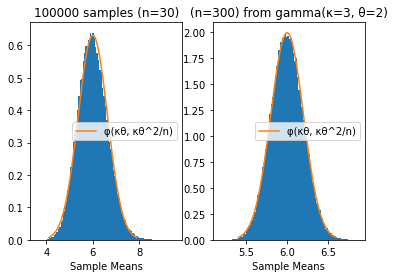

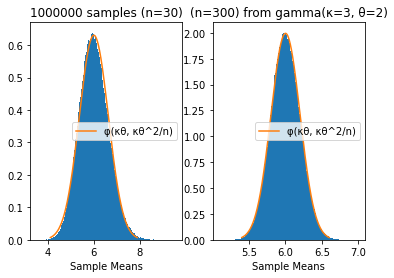

In [6]:
number_of_samples = 100  # more samples --> more normal
sample_size_small = 30  # larger sample --> narrower
kappa = 3  # shape
theta = 2  # scale
# beta = 1 / theta

plot_CLT(number_of_samples, sample_size_small, kappa, theta, number_of_bins=10)

number_of_samples *= 10
plot_CLT(number_of_samples, sample_size_small, kappa, theta, number_of_bins=35)

number_of_samples *= 10
plot_CLT(number_of_samples, sample_size_small, kappa, theta, number_of_bins=70)

number_of_samples *= 10
plot_CLT(number_of_samples, sample_size_small, kappa, theta, number_of_bins=100)

number_of_samples *= 10
plot_CLT(number_of_samples, sample_size_small, kappa, theta, number_of_bins=300)